# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [34]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")

In [35]:
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [36]:
# Exploring the Data
penguins_df.describe(include='all')

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,342.000000,342.000000,342.000000,342.000000,335
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,MALE
freq,NaN,NaN,NaN,NaN,169
mean,43.921930,17.151170,214.014620,4201.754386,NaN
std,5.459584,1.974793,260.558057,801.954536,NaN
min,32.100000,13.100000,-132.000000,2700.000000,NaN
25%,39.225000,15.600000,190.000000,3550.000000,NaN
50%,44.450000,17.300000,197.000000,4050.000000,NaN
75%,48.500000,18.700000,213.750000,4750.000000,NaN


In [37]:
# Dealing with missing values
penguins_df.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [38]:
# Replacing . with MALE
print(penguins_df['sex'].unique())
penguins_df['sex'] = penguins_df['sex'].str.replace('.', 'MALE')
print(penguins_df['sex'].unique())

['MALE' 'FEMALE' nan '.']
['MALE' 'FEMALE' nan]


In [39]:
# Dropping rows with null values

penguins_df = penguins_df.dropna()

In [40]:
penguins_df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [41]:
print(penguins_df['sex'].unique())

['MALE' 'FEMALE']


In [42]:
print(penguins_df.shape)
penguins_df.boxplot()

(335, 5)


<AxesSubplot: >

In [43]:
# Removing outliers

# Define the columns that will be used to identify outliers
columns_to_check = penguins_df.columns

# Calculate the Interquartile Range (IQR) for each column
Q1 = penguins_df[columns_to_check].quantile(0.25)
Q3 = penguins_df[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold to identify outliers
outlier_threshold = 1.5

# Identify and remove rows with outliers
outlier_mask = ((penguins_df[columns_to_check] < (Q1 - outlier_threshold * IQR)) | (penguins_df[columns_to_check] > (Q3 + outlier_threshold * IQR))).any(axis=1)
penguins_clean = penguins_df[~outlier_mask]
print(penguins_clean.shape)
penguins_clean.head()

(333, 5)


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


In [44]:
penguins_clean.boxplot()

<AxesSubplot: >

In [45]:
# one-hot encoding 
penguins_clean = pd.get_dummies(penguins_clean, columns=['sex'], drop_first=True)
# pd.get_dummies(penguins_df['sex'], drop_first=False)
penguins_clean.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,1


In [46]:
# columns_to_scale = [col for col in penguins_clean.columns if col != 'sex_MALE']

# # Use StandardScaler to scale all columns except 'sex_MALE'
# scaler = StandardScaler()
# penguins_preprocessed = pd.DataFrame(scaler.fit_transform(penguins_clean[columns_to_scale]), columns=columns_to_scale)

# # Add the 'sex_MALE' column back to the scaled DataFrame
# penguins_preprocessed['sex_MALE'] = penguins_clean['sex_MALE']
# penguins_preprocessed.head()

In [47]:
penguins_preprocessed.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex_MALE             0
dtype: int64

In [48]:
#Scale the data using the standard scaling
scaler = StandardScaler()
penguins_preprocessed = pd.DataFrame(scaler.fit_transform(penguins_clean), columns=penguins_clean.columns)
penguins_preprocessed.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,0.991031
1,-0.831938,0.128503,-1.071522,-0.507579,-1.009050
2,-0.684775,0.435252,-0.429637,-1.191006,-1.009050
3,-1.347011,1.099875,-0.572278,-0.942487,-1.009050
4,-0.868729,1.764498,-0.786240,-0.693968,0.991031


In [49]:
# Perform PCA to determine the desired number of components 
pca = PCA() 
pca.fit(penguins_preprocessed)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()

# Determine the number of components with explained variance ratio above 10%
n_components = (cumulative_variance_ratio > 0.10).sum()
print(n_components)

5


In [50]:
print(cumulative_variance_ratio)

[0.56851444 0.8494127  0.94607116 0.98002111 1.        ]


In [51]:
# Execute PCA using the determined number of components
pca = PCA(n_components=2)
penguins_PCA = pca.fit_transform(penguins_preprocessed)


In [52]:
# Display the DataFrame after PCA
penguins_PCA_df = pd.DataFrame(data=penguins_PCA, columns=[f"PC{i+1}" for i in range(2)])

penguins_PCA_df.head()

,PC1,PC2
0,-1.573297,1.196179
1,-1.543214,-0.713072
2,-1.594130,-0.577950
3,-2.062339,-0.235845
4,-1.585049,1.770006


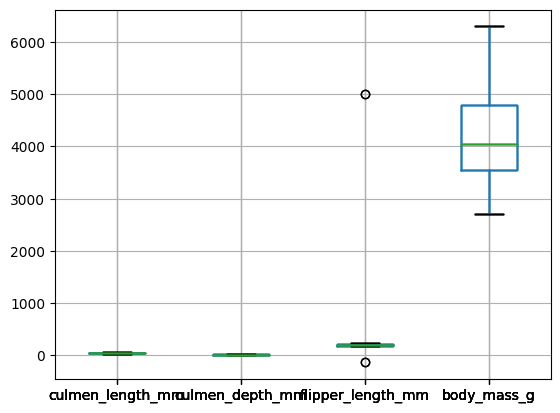

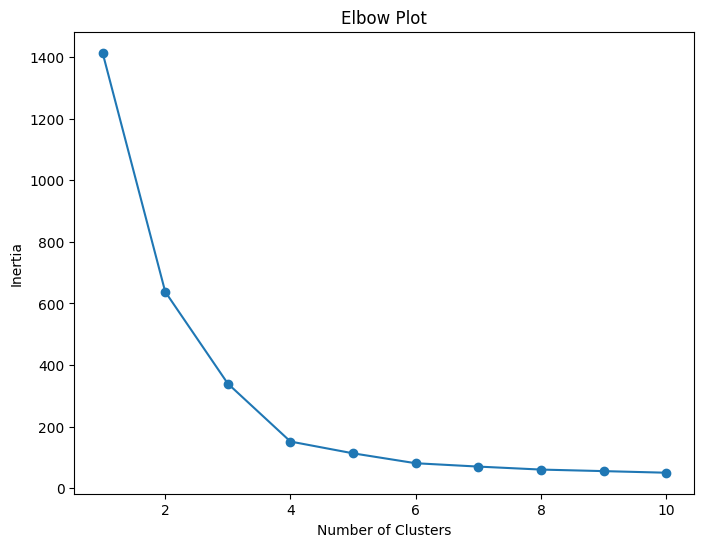

In [53]:
# Perform elbow analysis to determine the optimal number of clusters
inertia = []
possible_n_clusters = range(1, 11)  # Try different numbers of clusters
for n_clusters in possible_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(penguins_PCA)
    inertia.append(kmeans.inertia_)

# Elbow plot
plt.figure(figsize=(8, 6))
plt.plot(possible_n_clusters, inertia, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [54]:
n_cluster = 3

In [55]:
# Create and fit the k-means model
kmeans = KMeans(n_clusters=n_cluster, random_state=42)
kmeans.fit(penguins_PCA)

KMeans(n_clusters=3, random_state=42)

In [56]:
# Visualize clusters using the first two principal components
pca = PCA(n_components=2)
penguins_pca = pca.fit_transform(penguins_clean)

In [57]:
# Add cluster labels to penguins_clean DataFrame
penguins_clean['Cluster'] = kmeans.labels_

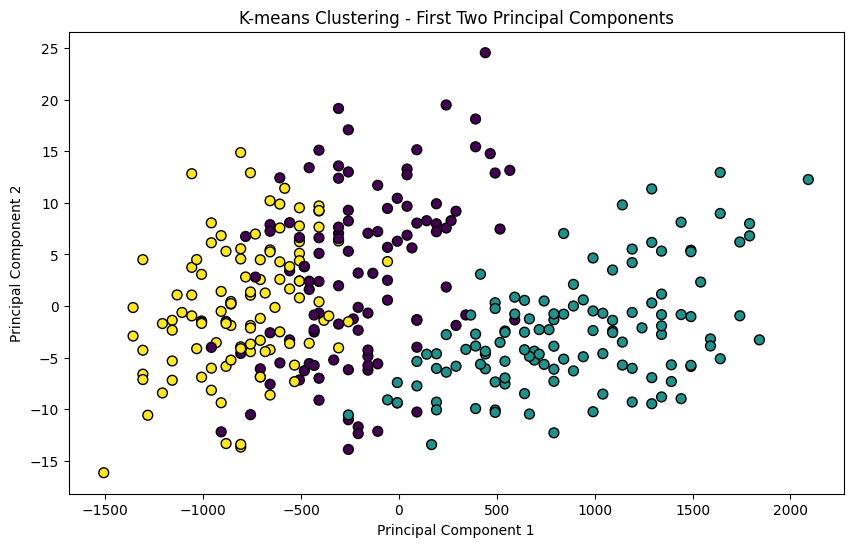

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE,Cluster
0,39.1,18.7,181.0,3750.0,1,0
1,39.5,17.4,186.0,3800.0,0,2
2,40.3,18.0,195.0,3250.0,0,2
4,36.7,19.3,193.0,3450.0,0,2
5,39.3,20.6,190.0,3650.0,1,0


In [60]:
# Visualize clusters in 2D space
plt.figure(figsize=(10, 6))
plt.scatter(penguins_pca[:, 0], penguins_pca[:, 1], c=kmeans.labels_, cmap='viridis', edgecolor='k', s=50)
plt.title('K-means Clustering - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Display penguins_clean DataFrame with cluster labels
penguins_clean.head()

In [61]:
# Group by the "label" column and calculate the mean for each numeric column
stat_penguins = penguins_clean.groupby('Cluster').mean()

# Display the statistical table
stat_penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
Cluster,,,,,
0,44.067593,19.095370,194.666667,4001.620370,0.981481
1,47.542500,15.002500,217.233333,5090.625000,0.516667
2,39.953333,17.599048,189.038095,3413.095238,0.000000
